In [ ]:
import json
from kaggle_environments.envs.halite.helpers import *
from kaggle_environments import evaluate, make
from kaggle_environments.envs.halite.helpers import *
import numpy as np
import pandas as pd


# What's this
- Visualize battle results from leaderboard downloaded or
- use this notebook with any local result json file 


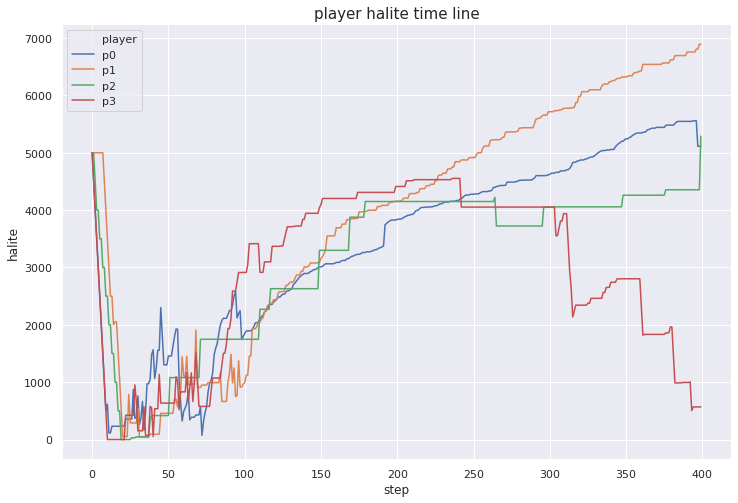

# Step
- first download json here


replay.png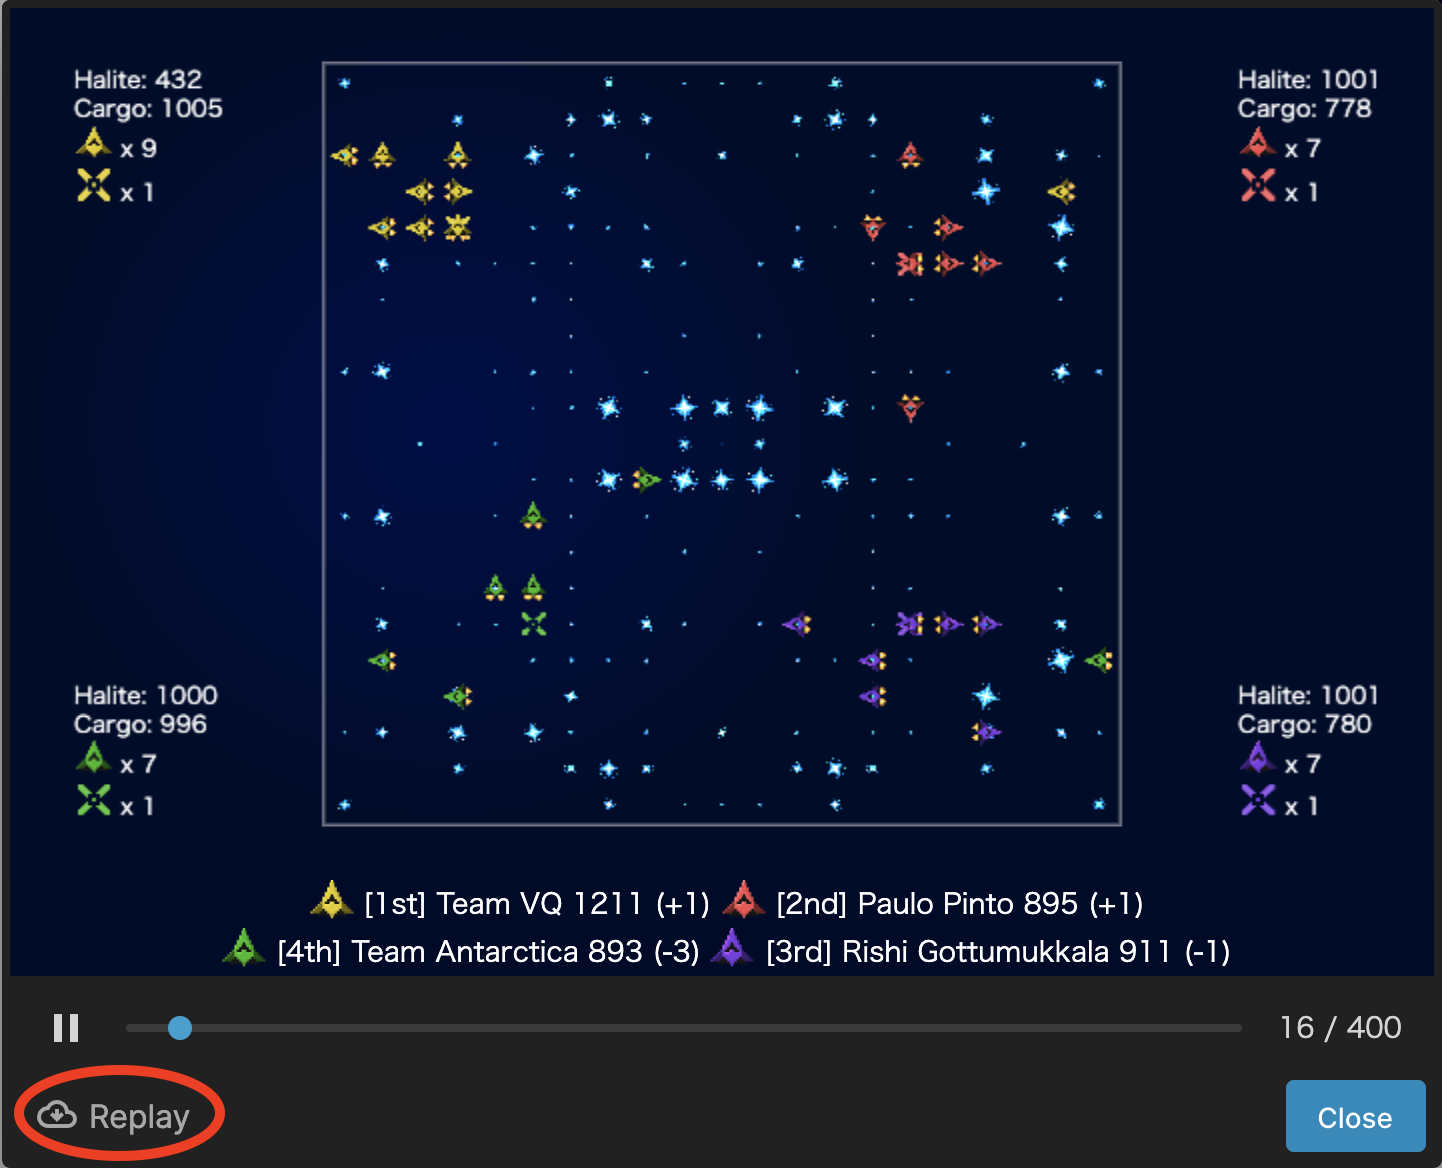

- next upload file to notebook (Add data button)


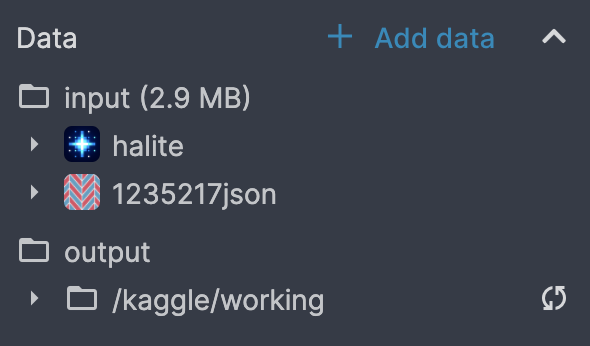

# make env from result json file

In [ ]:
with open('../input/1235217json/1235217.json') as file:
    data = json.load(file)

env = make('halite', configuration=data['configuration'], steps=data['steps'])
env.render(mode="ipython", width=800, height=600)


# change env to Dataframe

In [ ]:
pre_count = 1
steps = []
board_halite = []
p0_halite = []
p1_halite = []
p2_halite = []
p3_halite = []
p0_cargo = []
p1_cargo = []
p2_cargo = []
p3_cargo = []
p0_ships = []
p1_ships = []
p2_ships = []
p3_ships = []
p0_shipyards = []
p1_shipyards = []
p2_shipyards = []
p3_shipyards = []
configuration = env.configuration

for step_env in env.steps:
    observation = step_env[0]['observation']
    board = Board(observation, configuration)
    steps.append(observation['step'])
    last_step = observation['step']
    board_halite.append(sum(observation['halite']))
    p0_halite.append(board.players[0].halite)
    p1_halite.append(board.players[1].halite)
    p2_halite.append(board.players[2].halite)
    p3_halite.append(board.players[3].halite)
    p0_cargo.append(sum([ship.halite for ship in board.players[0].ships]))
    p1_cargo.append(sum([ship.halite for ship in board.players[1].ships]))
    p2_cargo.append(sum([ship.halite for ship in board.players[2].ships]))
    p3_cargo.append(sum([ship.halite for ship in board.players[3].ships]))
    p0_ships.append(len(board.players[0].ship_ids))
    p1_ships.append(len(board.players[1].ship_ids))
    p2_ships.append(len(board.players[2].ship_ids))
    p3_ships.append(len(board.players[3].ship_ids))
    p0_shipyards.append(len(board.players[0].shipyard_ids))
    p1_shipyards.append(len(board.players[1].shipyard_ids))
    p2_shipyards.append(len(board.players[2].shipyard_ids))
    p3_shipyards.append(len(board.players[3].shipyard_ids))

df = pd.DataFrame(
    data={'step': steps, 'board_halite': board_halite,
          'p0_halite': p0_halite,
          'p1_halite': p1_halite,
          'p2_halite': p2_halite,
          'p3_halite': p3_halite,
          'p0_cargo': p0_cargo,
          'p1_cargo': p1_cargo,
          'p2_cargo': p2_cargo,
          'p3_cargo': p3_cargo,
          'p0_ships': p0_ships,
          'p1_ships': p1_ships,
          'p2_ships': p2_ships,
          'p3_ships': p3_ships,
          'p0_shipyards': p0_shipyards,
          'p1_shipyards': p1_shipyards,
          'p2_shipyards': p2_shipyards,
          'p3_shipyards': p3_shipyards,
          },
    columns=['step', 'board_halite',
             'p0_halite',
             'p1_halite',
             'p2_halite',
             'p3_halite',
             'p0_cargo',
             'p1_cargo',
             'p2_cargo',
             'p3_cargo',
             'p0_ships',
             'p1_ships',
             'p2_ships',
             'p3_ships',
             'p0_shipyards',
             'p1_shipyards',
             'p2_shipyards',
             'p3_shipyards',
             ]
)
df['p0_total_halite']  = df['p0_halite'] + df['p0_cargo']
df['p1_total_halite']  = df['p1_halite'] + df['p1_cargo']
df['p2_total_halite']  = df['p2_halite'] + df['p2_cargo']
df['p3_total_halite']  = df['p3_halite'] + df['p3_cargo']

df

In [ ]:
df.describe()

In [ ]:
import seaborn as sns
import numpy as np                             
import pandas as pd                              
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
sns.set()


In [ ]:
df0 = pd.DataFrame(
data={'player':'p0','step': steps, 'board_halite': board_halite,
    'halite': p0_halite,
    'cargo': p0_cargo,
    'ships': p0_ships,
    'shipyards': p0_shipyards,
},
columns=['player','step', 'board_halite',
     'halite',
     'cargo',
     'ships',
     'shipyards',
 ]
)
df1 = pd.DataFrame(
data={'player':'p1','step': steps, 'board_halite': board_halite,
    'halite': p1_halite,
    'cargo': p1_cargo,
    'ships': p1_ships,
    'shipyards': p1_shipyards,
},
columns=['player','step', 'board_halite',
     'halite',
     'cargo',
     'ships',
     'shipyards',
 ]
)
df2 = pd.DataFrame(
data={'player':'p2','step': steps, 'board_halite': board_halite,
    'halite': p2_halite,
    'cargo': p2_cargo,
    'ships': p2_ships,
    'shipyards': p2_shipyards,
},
columns=['player','step', 'board_halite',
     'halite',
     'cargo',
     'ships',
     'shipyards',
 ]
)
df3 = pd.DataFrame(
data={'player':'p3','step': steps, 'board_halite': board_halite,
    'halite': p3_halite,
    'cargo': p3_cargo,
    'ships': p3_ships,
    'shipyards': p3_shipyards,
},
columns=['player','step', 'board_halite',
     'halite',
     'cargo',
     'ships',
     'shipyards',
 ]
)

df_merged = pd.concat([df0,df1,df2,df3])


In [ ]:
df_merged['total_halite'] = df_merged['halite'] + df_merged['cargo']
df_merged['cargo_average']  = df_merged['cargo'] / df_merged['ships']
df_merged['cargo_percentage'] = df_merged['cargo'] / df_merged['total_halite']

In [ ]:
df_merged

# Visualization

In [ ]:
plt.figure(figsize=(12,8))
plt.title("player halite at game end", fontsize=15)
sns.barplot(data=df_merged[df_merged['step']==last_step],x='player',y='halite',ci=None)
plt.ylabel('halite', fontsize=12)
plt.xlabel('player', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("average halite in game", fontsize=15)
sns.barplot(data=df_merged,x='player',y='halite',ci=None)
plt.ylabel('mean halite', fontsize=12)
plt.xlabel('player', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("player cargo at game end", fontsize=15)
sns.barplot(data=df_merged[df_merged['step']==last_step],x='player',y='cargo',ci=None)
plt.ylabel('cargo', fontsize=12)
plt.xlabel('player', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("player halite time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='halite' ,hue='player')
plt.ylabel('halite', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("player and board halite time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='halite' ,hue='player')
sns.lineplot(data=df,x='step',y='board_halite' ,color='black')
plt.ylabel('halite', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("player cargo time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='cargo', hue='player')
plt.ylabel('cargo', fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.title("player cargo and board halite time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='cargo', hue='player')
sns.lineplot(data=df,x='step',y='board_halite' ,color='black')
plt.ylabel('cargo', fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.title("total halite (halite + cargo) time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='total_halite', hue='player')
plt.ylabel('halite (halite + cargo)', fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.title("cargo percentage (cargo / (halite + cargo)) time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='cargo_percentage', hue='player')
plt.ylabel('cargo percentage (cargo / (halite + cargo))', fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.title("total shipyard count time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='shipyards', hue='player')
plt.ylabel('shipyard count', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("average shipyard count in game", fontsize=15)
sns.barplot(data=df_merged,x='player',y='shipyards',ci=None)
plt.ylabel('mean shipyard count', fontsize=12)
plt.xlabel('player', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("total ship count time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='ships', hue='player')
plt.ylabel('ship count', fontsize=12)
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
plt.title("average ship count in game", fontsize=15)
sns.barplot(data=df_merged,x='player',y='ships',ci=None)
plt.ylabel('mean ship count', fontsize=12)
plt.xlabel('player', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("cargo average(cargo / ship count)  time line", fontsize=15)
sns.lineplot(data=df_merged,x='step',y='cargo_average', hue='player')
plt.ylabel('cargo average', fontsize=12)
plt.show()
